In [6]:
import pandas as pd

#Importing Files
df= pd.read_csv('/content/sample_data/weather-agg-DFE.csv')

#Checking Missing Values
print(df.isnull().sum())

df1 = df[['_unit_id', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'what_emotion_does_the_author_express_specifically_about_the_weather','what_emotion_does_the_author_express_specifically_about_the_weather:confidence','tweet_id','tweet_text']].copy()
df1.head()

#Checking for Duplicates
duplicates = df1.duplicated().sum()
duplicates



_unit_id                                                                             0
_canary                                                                           1000
_unit_state                                                                          0
_trusted_judgments                                                                   0
_last_judgment_at                                                                    0
what_emotion_does_the_author_express_specifically_about_the_weather                  0
what_emotion_does_the_author_express_specifically_about_the_weather:confidence       0
gold_answer                                                                       1000
tweet_id                                                                             0
tweet_text                                                                           0
dtype: int64


0

In [7]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
!pip install text_preprocessing
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [9]:
tweet_text = df1['tweet_text']
cleaned_text = []
for text in tweet_text:
    clean_text = re.sub(r"[~.,%/\:;?_&+*-=!-()@#^{}]", " ", text)
    clean_text = re.sub(r'\d', '', clean_text)
    cleaned_text.append(clean_text)

In [10]:
lowercase_list = [item.lower() for item in cleaned_text]

In [11]:
remove_punctuation_list = [remove_punctuation(item) for item in lowercase_list]

In [12]:
special_item = '{link}'
remove_special_item_list = [item.replace(special_item, "") for item in remove_punctuation_list]

In [13]:
special_item1 = '@mention'
remove_special_item_list1 = [item.replace(special_item1, "") for item in remove_special_item_list]

In [14]:
remove_special_item_list1

['grilling kabobs on the grill last night was amazing  i m so glad this weather is finally  here ',
 'the slowest day ever    and the weather makes it even worse  ',
 'fire weather watch issued may    at     pm cdt expiring may    at     pm cdt by nws lubbock     link ',
 'im going to lunch early today    the weather is nice outside so im going to enjoy  metime somewhere pleasant   ',
 'weekend weather causes delays in i     bridge work   link ',
 'passing out now   working tonight  storms today would be nice  would be great sleeping weather  mmmm',
 'us gas  warm weather forecasts lift natural gas futures  link ',
 ' mention s friday at   at tha stadium    if tha weather bad its gone be in tha gym at  ',
 'i hate this weather  good day for a movie marathon though    xmen   d',
 'tgif biatches  here s to a sunny friday regardless of rain and drama   popularnameregardlessofparticipation',
 ' mention good crowd in wrigley today  terrible weather  tell that redneck that just called in   c

In [15]:
cleaned_text = remove_special_item_list1

In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_text = [[word for word in text.split() if word not in stop_words] for text in cleaned_text]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
filtered_text

[['grilling',
  'kabobs',
  'grill',
  'last',
  'night',
  'amazing',
  'glad',
  'weather',
  'finally'],
 ['slowest', 'day', 'ever', 'weather', 'makes', 'even', 'worse'],
 ['fire',
  'weather',
  'watch',
  'issued',
  'may',
  'pm',
  'cdt',
  'expiring',
  'may',
  'pm',
  'cdt',
  'nws',
  'lubbock',
  'link'],
 ['im',
  'going',
  'lunch',
  'early',
  'today',
  'weather',
  'nice',
  'outside',
  'im',
  'going',
  'enjoy',
  'metime',
  'somewhere',
  'pleasant'],
 ['weekend', 'weather', 'causes', 'delays', 'bridge', 'work', 'link'],
 ['passing',
  'working',
  'tonight',
  'storms',
  'today',
  'would',
  'nice',
  'would',
  'great',
  'sleeping',
  'weather',
  'mmmm'],
 ['us',
  'gas',
  'warm',
  'weather',
  'forecasts',
  'lift',
  'natural',
  'gas',
  'futures',
  'link'],
 ['mention',
  'friday',
  'tha',
  'stadium',
  'tha',
  'weather',
  'bad',
  'gone',
  'tha',
  'gym'],
 ['hate', 'weather', 'good', 'day', 'movie', 'marathon', 'though', 'xmen'],
 ['tgif',
  '

In [31]:
all_words = [word for sublist in filtered_text for word in sublist]

In [35]:
import nltk
from nltk.corpus import opinion_lexicon
from collections import Counter
nltk.download('opinion_lexicon')
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [37]:
emotion_words = [word for word in all_words if word in positive_words or word in negative_words]
emotion_word_freq = Counter(emotion_words)
top_emotion_words = emotion_word_freq.most_common(10)
top_emotion_words, emotion_counts = zip(*top_emotion_words)

In [38]:
print("Top Emotion Words:", top_emotion_words)
print("Emotion Counts:", emotion_counts)

Top Emotion Words: ('hot', 'like', 'cold', 'good', 'severe', 'love', 'nice', 'freezing', 'warm', 'beautiful')
Emotion Counts: (89, 58, 41, 34, 34, 33, 32, 31, 28, 26)


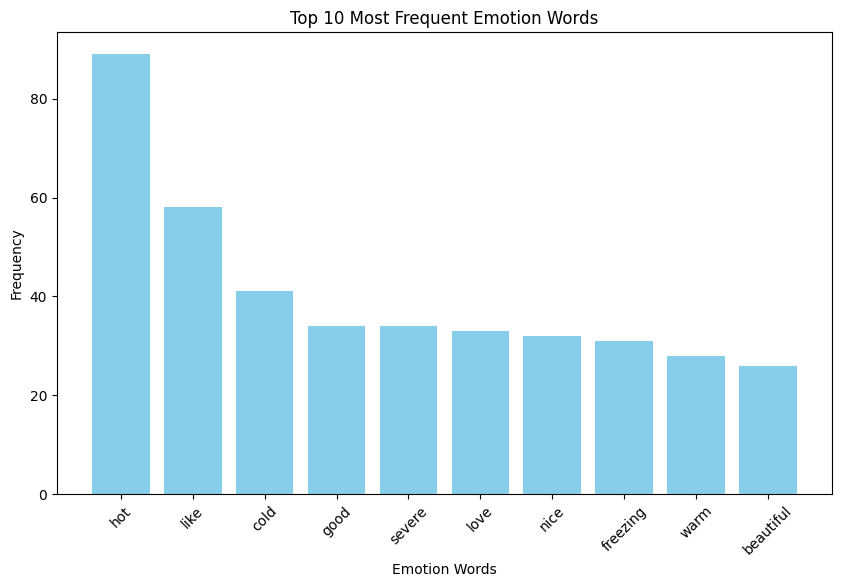

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(top_emotion_words, emotion_counts, color='skyblue')
plt.xlabel('Emotion Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Emotion Words')
plt.xticks(rotation=45)
plt.show()